<img src="https://shwetkm.github.io/upxlogo.png"></img>

# Exploratory Data Analysis using Python(Part 02) - Data Science Foundation


**SET THE WORKING DIRECTORY SO THAT WE DO NOT HAVE TO THINK ABOUT PATH PROBLEMS**

Please ensure all your folder names <font color='red'><b>do not have a space & use forward slash (/)</b></font>

In [40]:
your_local_path="C:/sandbox/python/Datasets/"

Techniques/questions to look at in this module:
<b><i>
+ How to merge datasets and different merge techniques
+ List of movies that are rated most by users
+ In ratings, how to address ratings sparsity problem
+ Plot distributions
+ Identify different age groups and technique of binning
+ Subgrouping and unstacking
+ Differences in ratings by gender
</b></i>

In [2]:
import pandas as pd
import numpy as np

In [41]:
# Pass column names in names for each CSV

# Load the users data
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv(your_local_path+'u.user', sep='|', names=u_cols,
                    encoding='latin-1')

# Load the ratings data
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv(your_local_path+'u.data', sep='\t', names=r_cols,
                      encoding='latin-1')

# the movies file contains columns indicating the movie's genres
# let's only load the first five columns of the file with usecols

# Load the movies data
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
movies = pd.read_csv(your_local_path+'u.item', sep='|', names=m_cols, usecols=range(5),
                     encoding='latin-1')

In [42]:
# Check the structure of Users data
users.shape

(943, 5)

In [5]:
# Check few sample values of user data
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [6]:
# Get information on user data
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
user_id       943 non-null int64
age           943 non-null int64
sex           943 non-null object
occupation    943 non-null object
zip_code      943 non-null object
dtypes: int64(2), object(3)
memory usage: 36.9+ KB


In [7]:
# Get data type information of movies data
movies.dtypes

movie_id                int64
title                  object
release_date           object
video_release_date    float64
imdb_url               object
dtype: object

In [8]:
# Describe the spread of the users data
users.describe()

,user_id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


In [9]:
# Get sample movie ids
movies['movie_id'].head()

0    1
1    2
2    3
3    4
4    5
Name: movie_id, dtype: int64

In [10]:
# Selecting a subset of columns from the movies data
movies[['movie_id','title']].head()

,movie_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [11]:
# Another example of subsetting (Putting a condition)
users[users.age<40].tail()

,user_id,age,sex,occupation,zip_code
937,938,38,F,technician,55038
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
942,943,22,M,student,77841


In [12]:
# More conditions
users[(users.age < 40) & (users.sex == 'F')].head(3)

,user_id,age,sex,occupation,zip_code
4,5,33,F,other,15213
10,11,39,F,other,30329
11,12,28,F,other,06405


In [13]:
# Create the index for the users dataset. Can run only once, do not run more than once, else you shall get an error.
users.set_index('user_id', inplace=False)
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
# If you wish then please reset the index
users.reset_index(inplace=False)
users.head()

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [15]:
# Merge datasets - Movies, ratings & users
print(movies.shape)
print(movies.size)
movies.head()    # movie_id

(1682, 5)
8410


,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)


In [16]:
ratings.head()
print(ratings.shape)
print(ratings.size)

(100000, 4)
400000


In [17]:
users.head()
print(users.shape)
print(users.size)

(943, 5)
4715


In [18]:
# Merge datasets - Movies, ratings & users
movies.head()    # movie_id
ratings.head()   # movie_id & user_id
#users.head()     # user_id

movie_ratings = pd.merge(movies, ratings)
lens = pd.merge(movie_ratings, users)
lens

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076
1,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,308,5,887737890,60,M,retired,95076
2,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,308,4,887738847,60,M,retired,95076
4,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),308,5,887736696,60,M,retired,95076
5,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,308,4,887737194,60,M,retired,95076
6,11,Seven (Se7en) (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Se7en%20(1995),308,5,887737837,60,M,retired,95076
7,12,"Usual Suspects, The (1995)",14-Aug-1995,NaN,http://us.imdb.com/M/title-exact?Usual%20Suspe...,308,5,887737243,60,M,retired,95076
8,15,Mr. Holland's Opus (1995),29-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Mr.%20Holland...,308,3,887739426,60,M,retired,95076
9,17,From Dusk Till Dawn (1996),05-Feb-1996,NaN,http://us.imdb.com/M/title-exact?From%20Dusk%2...,308,4,887739056,60,M,retired,95076


In [19]:
print(lens.head())
print(movies.shape)
movies.head()
print(ratings.shape)
print(users.shape)
lens.shape

   movie_id                  title release_date  video_release_date  \
0         1       Toy Story (1995)  01-Jan-1995                 NaN   
1         4      Get Shorty (1995)  01-Jan-1995                 NaN   
2         5         Copycat (1995)  01-Jan-1995                 NaN   
3         7  Twelve Monkeys (1995)  01-Jan-1995                 NaN   
4         8            Babe (1995)  01-Jan-1995                 NaN   

                                            imdb_url  user_id  rating  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...      308       4   
1  http://us.imdb.com/M/title-exact?Get%20Shorty%...      308       5   
2  http://us.imdb.com/M/title-exact?Copycat%20(1995)      308       4   
3  http://us.imdb.com/M/title-exact?Twelve%20Monk...      308       4   
4     http://us.imdb.com/M/title-exact?Babe%20(1995)      308       5   

   unix_timestamp  age sex occupation zip_code  
0       887736532   60   M    retired    95076  
1       887737890   60   M    retire

(100000, 12)

In [20]:
# Let us answer some simple questions now. 
# Most rated movies
#print(lens.groupby('title').size())
most_rated = lens.groupby('title').size().sort_values(ascending=False)
most_rated.head(1)

title
Star Wars (1977)    583
dtype: int64

In [21]:
# Another way to get the mentions. value_counts: The resulting object will be in descending order so that the first element is the most frequently-occurring 
lens.title.value_counts()[:20]

Star Wars (1977)                    583
Contact (1997)                      509
Fargo (1996)                        508
Return of the Jedi (1983)           507
Liar Liar (1997)                    485
English Patient, The (1996)         481
Scream (1996)                       478
Toy Story (1995)                    452
Air Force One (1997)                431
Independence Day (ID4) (1996)       429
Raiders of the Lost Ark (1981)      420
Godfather, The (1972)               413
Pulp Fiction (1994)                 394
Twelve Monkeys (1995)               392
Silence of the Lambs, The (1991)    390
Jerry Maguire (1996)                384
Chasing Amy (1997)                  379
Rock, The (1996)                    378
Empire Strikes Back, The (1980)     367
Star Trek: First Contact (1996)     365
Name: title, dtype: int64

In [22]:
# Highest rated movies
highest_ratings = lens.groupby('title').agg({'rating':[np.size,np.mean,np.max,np.min]})
highest_ratings.head()

rating                    
                            size      mean amax amin
title                                               
'Til There Was You (1997)      9  2.333333    4    1
1-900 (1994)                   5  2.600000    4    1
101 Dalmatians (1996)        109  2.908257    5    1
12 Angry Men (1957)          125  4.344000    5    2
187 (1997)                    41  3.024390    5    1

In [23]:
# Let us sort the output and see what we get
highest_ratings.sort_values([('rating', 'mean')], ascending=False).head()

rating               
                                             size mean amax amin
title                                                           
They Made Me a Criminal (1939)                  1  5.0    5    5
Marlene Dietrich: Shadow and Light (1996)       1  5.0    5    5
Saint of Fort Washington, The (1993)            2  5.0    5    5
Someone Else's America (1995)                   1  5.0    5    5
Star Kid (1997)                                 3  5.0    5    5

In [24]:
# We shall consider movies that have been rated more than 100 times
atleast_100 = highest_ratings['rating']['size'] >= 100
highest_ratings[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:15]

rating                    
                                         size      mean amax amin
title                                                            
Close Shave, A (1995)                     112  4.491071    5    1
Schindler's List (1993)                   298  4.466443    5    1
Wrong Trousers, The (1993)                118  4.466102    5    1
Casablanca (1942)                         243  4.456790    5    1
Shawshank Redemption, The (1994)          283  4.445230    5    1
Rear Window (1954)                        209  4.387560    5    2
Usual Suspects, The (1995)                267  4.385768    5    1
Star Wars (1977)                          583  4.358491    5    1
12 Angry Men (1957)                       125  4.344000    5    2
Citizen Kane (1941)                       198  4.292929    5    2
To Kill a Mockingbird (1962)              219  4.292237    5    1
One Flew Over the Cuckoo's Nest (1975)    264  4.291667    5    1
Silence of the Lambs, The (1991)          390  4.289744    5    1
North by Northwest (1959)                 179  4.284916    5    2
Godfather, The (1972)                     413  4.283293    5    1

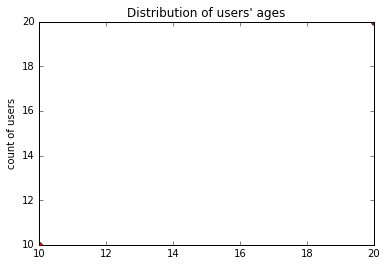

In [25]:
import matplotlib.pyplot as plt
% matplotlib inline
plt.plot([10,20],[10,20],'ro')
plt.title("Distribution of users' ages") 
plt.ylabel('count of users')



,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949


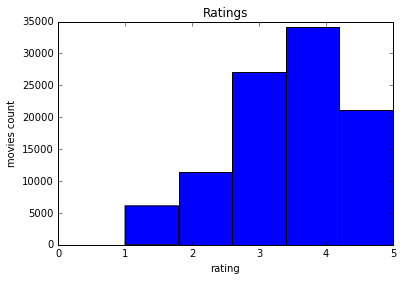

In [26]:
ratings.rating.plot.hist(bins=5) 
plt.title("Ratings") 
plt.ylabel('movies count') 
plt.xlabel('rating') 
plt.axis([0,5,0,35000])
ratings.head(1)

##### Lets plot the user age and count
users.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

ratings.rating.plot.hist(bins=5)
plt.title("Ratings")
plt.ylabel('movies count')
plt.xlabel('rating')
ratings.head(1)

In [27]:
# How to get the 397 th user's age
lens['age'][397]

21

In [28]:
# Let us create buckets age-wise
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens.head(1)

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69


In [29]:
labels = ['', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
lens['age_group'] = pd.cut(lens.age, range(0, 81, 10), right=False, labels=labels)
lens.head(1)

,movie_id,title,release_date,video_release_date,imdb_url,user_id,rating,unix_timestamp,age,sex,occupation,zip_code,age_group
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,308,4,887736532,60,M,retired,95076,60-69


In [30]:
# Group these age buckets and check the rating behaviour. Check who has given max & min number of ratings
lens.groupby('occupation').agg({'rating': [np.size, np.mean]})

rating          
                size      mean
occupation                    
administrator   7479  3.635646
artist          2308  3.653380
doctor           540  3.688889
educator        9442  3.670621
engineer        8175  3.541407
entertainment   2095  3.441050
executive       3403  3.349104
healthcare      2804  2.896220
homemaker        299  3.301003
lawyer          1345  3.735316
librarian       5273  3.560781
marketing       1950  3.485641
none             901  3.779134
other          10663  3.552377
programmer      7801  3.568260
retired         1609  3.466750
salesman         856  3.582944
scientist       2058  3.611273
student        21957  3.515143
technician      3506  3.532230
writer          5536  3.375723

In [31]:
# Get the top 100 most mentions
most_100 = lens.groupby('movie_id').size().sort_values(ascending=False)[:100]

In [32]:
# Lets set the movie_id as the index
lens.set_index('movie_id', inplace=True)

In [33]:
# Lets split the observations by title and age group
by_age = lens.loc[most_100.index].groupby(['title', 'age_group'])
by_age.rating.mean().head(15)

title                         age_group
2001: A Space Odyssey (1968)               5.000000
                              10-19        4.100000
                              20-29        3.924731
                              30-39        3.887500
                              40-49        4.093023
                              50-59        4.000000
                              60-69        4.285714
Air Force One (1997)          10-19        3.647059
                              20-29        3.666667
                              30-39        3.570000
                              40-49        3.555556
                              50-59        3.750000
                              60-69        3.666667
                              70-79        3.666667
Aladdin (1992)                10-19        3.840000
Name: rating, dtype: float64

In [34]:
# Make it more presentable using unstack
by_age.rating.mean().unstack(1).fillna(0)[10:20]

age_group,,10-19,20-29,30-39,40-49,50-59,60-69,70-79
title,,,,,,,,
"Birdcage, The (1996)",0.0,3.217391,3.413223,3.514286,3.500000,3.346154,3.888889,0.0
Blade Runner (1982),0.0,3.400000,4.134454,4.211765,4.147059,4.136364,4.400000,0.0
"Blues Brothers, The (1980)",0.0,4.214286,4.050505,3.637681,3.795455,3.450000,3.200000,0.0
Braveheart (1995),0.0,4.384615,4.194915,4.156627,4.051282,3.956522,3.714286,4.0
Broken Arrow (1996),0.0,3.363636,3.036697,2.938462,3.058824,3.052632,2.400000,0.0
Casablanca (1942),0.0,4.636364,4.447368,4.442857,4.530612,4.344828,4.285714,5.0
Chasing Amy (1997),0.0,4.130435,3.808333,3.679245,3.878788,3.789474,2.857143,0.0
"Clockwork Orange, A (1971)",0.0,4.600000,4.042105,3.688525,3.612903,4.176471,3.714286,0.0
Conspiracy Theory (1997),0.0,3.565217,3.382114,3.419355,3.465116,3.538462,2.600000,0.0


In [35]:
# Reset movie_id as index
lens.reset_index('movie_id', inplace=True)

In [36]:
# Let us pivot the data and split observations betweem male and female ratings
pivoted = lens.pivot_table(index=['movie_id', 'title'],
                           columns=['sex'],
                           values='rating',
                           fill_value=0)
pivoted.head()

,sex,F,M
movie_id,title,,
1,Toy Story (1995),3.789916,3.909910
2,GoldenEye (1995),3.368421,3.178571
3,Four Rooms (1995),2.687500,3.108108
4,Get Shorty (1995),3.400000,3.591463
5,Copycat (1995),3.772727,3.140625


In [37]:
# Try to find the rating behaviour difference between male and female
pivoted['diff'] = pivoted.M - pivoted.F
pivoted.head()

,sex,F,M,diff
movie_id,title,,,
1,Toy Story (1995),3.789916,3.909910,0.119994
2,GoldenEye (1995),3.368421,3.178571,-0.189850
3,Four Rooms (1995),2.687500,3.108108,0.420608
4,Get Shorty (1995),3.400000,3.591463,0.191463
5,Copycat (1995),3.772727,3.140625,-0.632102


In [43]:
# Reset movie_id as index again
pivoted.reset_index('movie_id', inplace=True)
pivoted

sex,title,movie_id,F,M,diff
0,Toy Story (1995),1,3.789916,3.909910,0.119994
1,GoldenEye (1995),2,3.368421,3.178571,-0.189850
2,Four Rooms (1995),3,2.687500,3.108108,0.420608
3,Get Shorty (1995),4,3.400000,3.591463,0.191463
4,Copycat (1995),5,3.772727,3.140625,-0.632102
5,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,6,3.600000,3.571429,-0.028571
6,Twelve Monkeys (1995),7,3.560976,3.861290,0.300315
7,Babe (1995),8,4.050000,3.974843,-0.075157
8,Dead Man Walking (1995),9,3.927711,3.884259,-0.043452
9,Richard III (1995),10,3.700000,3.869565,0.169565


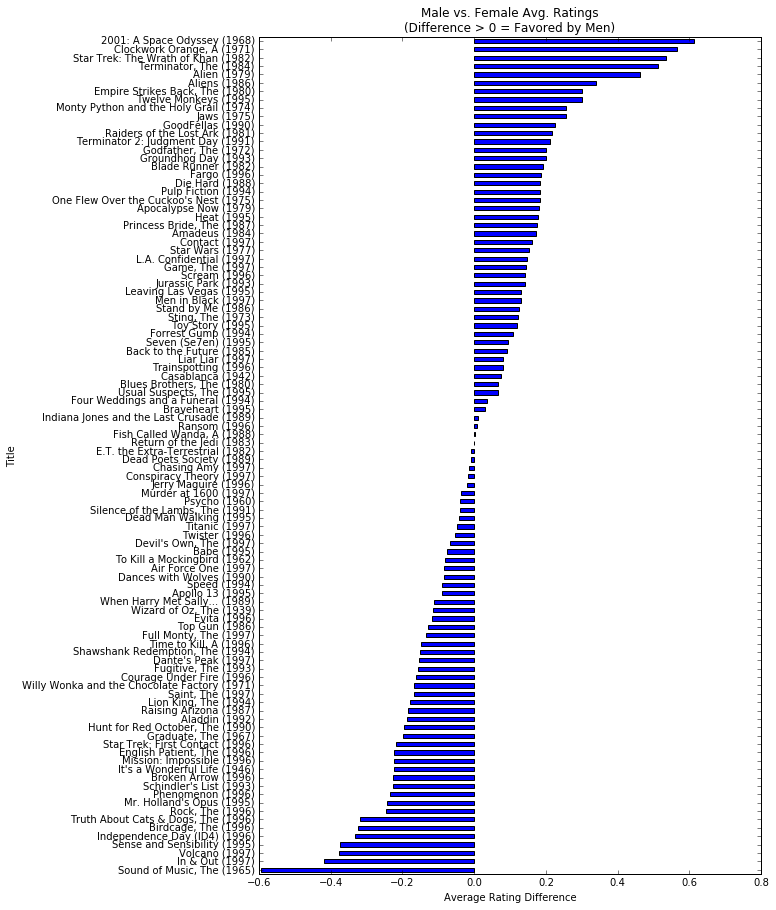

In [39]:
# Let us plot the rating differences between male and female and check for ourselves for patterns
disagreements = pivoted[pivoted.movie_id.isin(most_100.index)]['diff']
disagreements.sort_values().plot(kind='barh', figsize=[9, 15])
plt.title('Male vs. Female Avg. Ratings\n(Difference > 0 = Favored by Men)')
plt.ylabel('Title')
plt.xlabel('Average Rating Difference');